In [15]:
!pip install kagglehub

In [16]:
import kagglehub

path = kagglehub.dataset_download("valentynsichkar/traffic-signs-preprocessed")

print("✅ Dataset downloaded to:", path)

✅ Dataset downloaded to: /kaggle/input/traffic-signs-preprocessed


In [17]:
import os
for root, dirs, files in os.walk(path):
    print("📁", root)
    for d in dirs:
        print("   └── (dir)", d)
    for f in files[:5]:
        print("   └── (file)", f)


📁 /kaggle/input/traffic-signs-preprocessed
   └── (file) mean_image_rgb.pickle
   └── (file) data5.pickle
   └── (file) data4.pickle
   └── (file) data7.pickle
   └── (file) data8.pickle


In [19]:
import pickle
import os

dataset_path = '/kaggle/input/traffic-signs-preprocessed'

with open(os.path.join(dataset_path, 'data5.pickle'), 'rb') as f:
    data = pickle.load(f)

print("✅ Loaded successfully")
print("📦 Type of data:", type(data))
print("🔑 Keys in data:", data.keys())


✅ Loaded successfully
📦 Type of data: <class 'dict'>
🔑 Keys in data: dict_keys(['x_test', 'y_test', 'x_train', 'y_train', 'x_validation', 'y_validation', 'labels'])


In [20]:
import numpy as np
from tensorflow.keras.utils import to_categorical

X_train = data['x_train'] / 255.0
X_test = data['x_test'] / 255.0
X_val = data['x_validation'] / 255.0

y_train = to_categorical(data['y_train'])
y_test = to_categorical(data['y_test'])
y_val = to_categorical(data['y_validation'])

num_classes = y_train.shape[1]

print("✅ Training set:", X_train.shape)
print("✅ Validation set:", X_val.shape)
print("✅ Test set:", X_test.shape)

✅ Training set: (86989, 1, 32, 32)
✅ Validation set: (4410, 1, 32, 32)
✅ Test set: (12630, 1, 32, 32)


In [22]:
X_train = X_train.transpose(0, 2, 3, 1)
X_test = X_test.transpose(0, 2, 3, 1)
X_val = X_val.transpose(0, 2, 3, 1)

print("✅ New X_train shape:", X_train.shape)


✅ New X_train shape: (86989, 32, 32, 1)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=X_train.shape[1:]),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [24]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 124s 45ms/step - accuracy: 0.5823 - loss: 1.5506 - val_accuracy: 0.9603 - val_loss: 0.1365
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 139s 44ms/step - accuracy: 0.9621 - loss: 0.1314 - val_accuracy: 0.9800 - val_loss: 0.0680
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 140s 43ms/step - accuracy: 0.9772 - loss: 0.0739 - val_accuracy: 0.9846 - val_loss: 0.0623
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 118s 43ms/step - accuracy: 0.9847 - loss: 0.0518 - val_accuracy: 0.9769 - val_loss: 0.0978
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 139s 42ms/step - accuracy: 0.9880 - loss: 0.0414 - val_accuracy: 0.9844 - val_loss: 0.0744
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 145s 43ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9889 - val_loss: 0.0521
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 140s 42ms/step - accuracy: 0.9913 - loss: 0.0285 - val_accuracy: 0.9857 - val_loss: 0.0736
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 140s 42ms/step - accuracy: 

In [25]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {acc * 100:.2f}%")


395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9621 - loss: 0.2366
Final Test Accuracy: 96.47%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


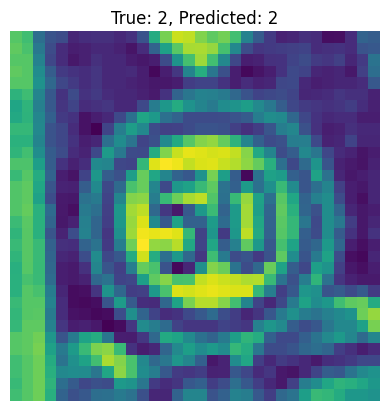

In [26]:
import matplotlib.pyplot as plt
import random
import numpy as np

index = random.randint(0, len(X_test) - 1)
sample = X_test[index]
true_label = np.argmax(y_test[index])

prediction = model.predict(np.expand_dims(sample, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(sample.squeeze())
plt.axis('off')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()